<a href="https://colab.research.google.com/github/scott-huberty/DeepUnderstandingOfDeepLearning/blob/codechallenges/data/DUDL_data_noiseAugmentation_SH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: More on data
### LECTURE: Data noise augmentation (with devset+test)
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
import xarray as xr

# A function that returns a dataset with a specified size

In [34]:
import pandas as pd

In [36]:
da

<xarray.DataArray (number: 19999, x: 28, y: 28)> Size: 125MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * number   (number) int64 160kB 5 7 9 5 2 0 6 5 5 2 7 ... 9 6 5 5 0 0 1 2 9 5
  * x        (x) int64 224B 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * y        (y) int64 224B 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27

In [58]:
# import dataset (comes with colab!)
df = pd.read_csv('sample_data/mnist_train_small.csv')

data_arrays = []
for tup in df.itertuples():
  sample = tup[0]
  number = tup._1
  pixels = np.array(tup[2:]).reshape(28,28)

  da = xr.DataArray(
      [pixels],
      dims=["number", "x", "y"],
      coords=dict(
          number=[number],
          x=list(range(pixels.shape[0])),
          y=list(range(pixels.shape[1]))),
  )
  data_arrays.append(da)

mnist_xr = xr.concat(data_arrays, dim="number")
del data_arrays

# normalize the data to a range of [0 1]
mnist_xr = mnist_xr / np.max(mnist_xr)
assert mnist_xr.max() <= 1.0, mnist_xr.max()
assert mnist_xr.min() >= 0.0, mnist_xr.min()

In [60]:
# check the size of this variable in mb
mnist_xr

<xarray.DataArray (number: 19999, x: 28, y: 28)> Size: 125MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * number   (number) int64 160kB 5 7 9 5 2 0 6 5 5 2 7 ... 9 6 5 5 0 0 1 2 9 5
  * x        (x) int64 224B 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * y        (y) int64 224B 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27

In [73]:
mnist_xr[0]

<xarray.DataArray (x: 28, y: 28)> Size: 6kB
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
...
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])
Coordinates:
    number   int64 8B 5
  * x        (x) int64 224B 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * y        (y) int64 224B 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27

In [94]:
# now for the function
def makeTheDataset(mnist_xr, N, double_data=False):
  """Make a Pytorch dataset of MNIST.

  Parameters
  ----------
  mnist_xr : xr.DataArray
    The Xarray we previously created of the MNIST dataset.
  N : int
    The number of samples to use for the train set.
  """

  # extract labels (number IDs) and remove from data
  data   = mnist_xr[:N].to_numpy().reshape(-1, 784)
  labels = mnist_xr[:N].coords['number'].values


  # make a noisy copy of ALL the data
  if double_data:
    noisy_data  = data + np.random.random_sample(data.shape) / 2
    data   = np.concatenate((data, noisy_data), axis=0)
    labels = np.concatenate((labels, labels), axis=0)


  # convert to tensor
  data_tensor   = torch.tensor(data).float()
  labels_tensor = torch.tensor(labels).long()

  # use scikitlearn to split the data
  (train_data,
   devset_data,
   train_labels,
   devset_labels) = train_test_split(data_tensor, labels_tensor, train_size=.9)


  # # make a noisy copy of the TRAIN data
  # if doubleTheData:
  #   train_dataN  = train_data + torch.rand_like(train_data)/2
  #   train_data   = torch.cat((train_data,train_dataN),axis=0)
  #   train_labels = torch.cat((train_labels,train_labels),axis=0)


  # convert into PyTorch Datasets
  train_data  = TensorDataset(train_data, train_labels)
  devset_data = TensorDataset(devset_data, devset_labels)

  # translate into dataloader objects
  batchsize     = 20
  train_loader  = DataLoader(
      train_data, batch_size=batchsize, shuffle=True, drop_last=True
      )
  devset_loader = DataLoader(
      devset_data, batch_size=devset_data.tensors[0].shape[0]
      )



  # NEW!! Create a test set (don't need a dataloader)
  testdata   = torch.tensor(
      mnist_xr[N:].to_numpy().reshape(-1, 784)
      ).float()
  testlabels = torch.tensor(
      mnist_xr[N:].coords['number'].values
      ).long()

  return train_loader,devset_loader,(testdata,testlabels)

In [125]:
def loader_to_xr(loader):
  from functools import partialmethod
  pixels = loader.dataset.tensors[0].detach().numpy()
  labels = loader.dataset.tensors[1].detach().numpy()
  data_arrays = []
  for these_pixels, number in zip(pixels, labels):
    these_pixels = these_pixels.reshape(28,28)
    da = xr.DataArray(
        [these_pixels],
        dims=["number", "x", "y"],
        coords=dict(
            number=[number],
            x=list(range(these_pixels.shape[0])),
            y=list(range(these_pixels.shape[1]))),
    )
    data_arrays.append(da)
  return xr.concat(data_arrays, dim="number")

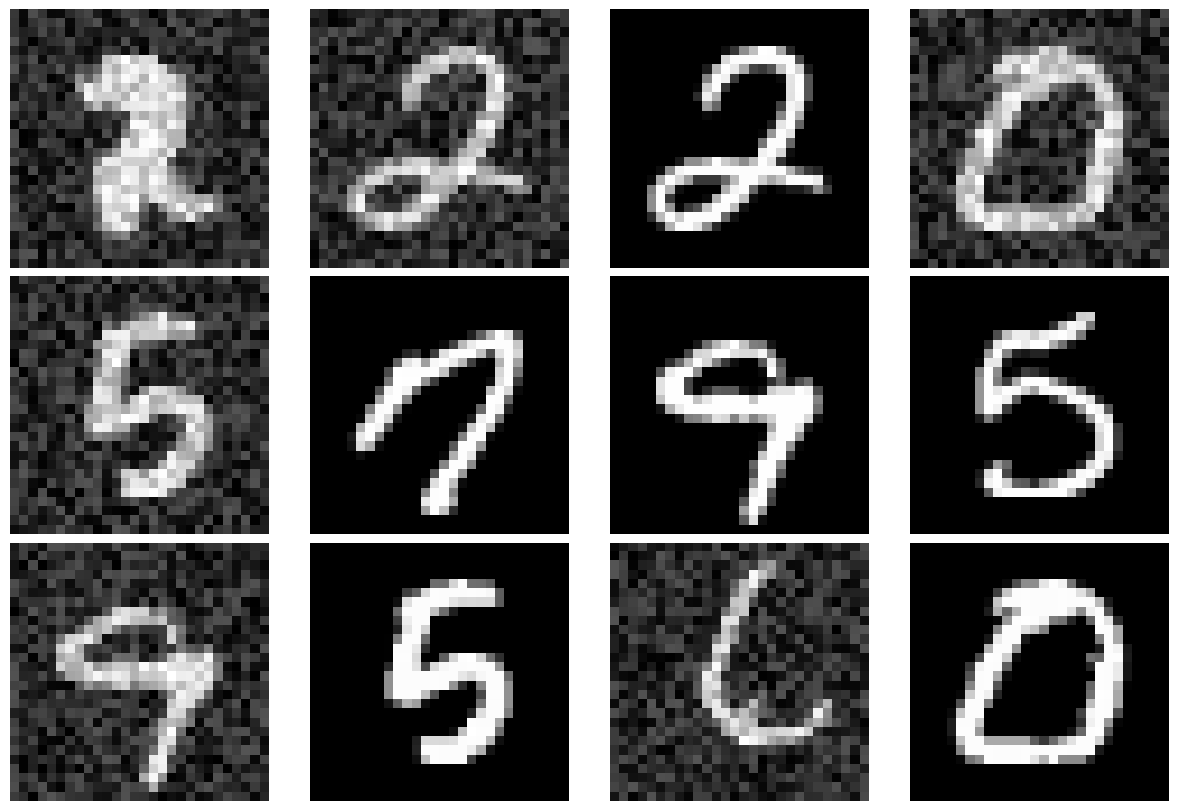

In [132]:
# visualize the images

# get some sample data
train_loader, devset_loader, testdataset = makeTheDataset(mnist_xr, 12, True)

train_xr = loader_to_xr(train_loader)


# show the numbers
fig, ax = plt.subplots(3, 4, figsize=(12,8), constrained_layout=True)

for i,ax in enumerate(ax.flatten()):
  #train_xr[i].T.plot(ax=ax, cmap="gray")
  ax.imshow(train_xr[i].to_numpy(), cmap="gray")
  ax.axis('off')
plt.show()

# Create the DL model

In [ ]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)

      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

# Create a function that trains the model

In [ ]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 50

  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  devsetAcc = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # devset accuracy
    X,y = next(iter(devset_loader)) # extract X,y from devset dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    devsetAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,devsetAcc,losses,net

# Run an experiment showing better performance with increased N



In [ ]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,devset_loader,testdataset = makeTheDataset(ssize,False)
  trainAcc,devsetAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(devsetAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()




  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,devset_loader,testdataset = makeTheDataset(ssize,True)
  trainAcc,devsetAcc,losses,net          = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(devsetAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()


In [ ]:
# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Augmented')

  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

# Now for test accuracy!

In [ ]:
# we need to re-run the models for N=500

samplesize = 500

train_loader,devset_loader,testdataset  = makeTheDataset(samplesize,False)
trainAccO,devsetAccO,lossesO,netO       = function2trainTheModel() # O = original

train_loader,devset_loader,testdataset  = makeTheDataset(samplesize,True)
trainAccA,devsetAccA,lossesA,netA       = function2trainTheModel() # A = augmented

In [ ]:
# Now for the real test! On the test data!

# extract the test data
X,y = testdataset

# run the original model
yHat = netO(X)
testO = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# And the augmented model
yHat = netA(X)
testA = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# print the results!
print( f'ORIGINAL MODEL (N={samplesize}):\n  Train: {trainAccO[-1]:.2f}%, devset: {devsetAccO[-1]:.2f}%, test: {testO:.2f}%\n\n')
print(f'AUGMENTED MODEL (N={samplesize}):\n  Train: {trainAccA[-1]:.2f}%, devset: {devsetAccA[-1]:.2f}%, test: {testA:.2f}%')


# Additional explorations

In [ ]:
# 1) It looks like noise augmentation only helped for small sample sizes (<1000). Write code to run a new experiment that
#    reproduces this experiment 10 times, but only using sample sizes [500,1000,2000]. Then make a plot showing the increase
#    in devset accuracy for all 10 runs. That will help determine whether our finding above was a quirk of sampling
#    variability or a meaningful effect.
#
# 2) Immediately after loading in the MNIST data (top of the script), there is the following code:
#    dataFull[:,1:] = dataFull[:,1:] / np.max(dataFull)
#    This is different from the corresponding normalization code in the previous MNIST videos. Do you need the [:,1:]?
#    What happens when you change that line to: dataFull = dataFull / np.max(dataFull)
#    Can you still train the model?
#
# 3) We augmented the data using noisy copies. Another idea is to augment the dataset using color-flipped copies. Thus,
#    the numbers will be black on a white background. Try it and see how the results compare to the noise-added version!
#